# Data Parsing and Exploratory Analysis FULL RADIOTECA
Jana Bruses | janabruses@pitt.edu | University of Pittsburgh | Feb. 23rd - Mar. 31st 2025 *modified Apr 25th

This is the FINAL data adquisition notebook.
In this notebook 4 different data sources/corpora were adquired and explored separately.
The notebook goes through some considerations, the adquisition, analysis and conclusions as well as saving each of the data sources separatley, then merged in our final data form on ADD LINK. 

## 1. A few data considerations
Citing Montoya Abat and Mas I Miralles’ notes in Linguistic Variation, “written language always represents a later stage than the actual appearance of any linguistic phenomenon, since the written text incorporates innovations when in oral expression they have already been occurring for some time.” They further add that in written language, “the appearance of occurrences tends to be considerably reduced.” That is because standardization tends to substantially influence written language more, particularly in literary works, which go through multiple reviews before publication.

In this regard, since we are examining language variation, spoken data would likely provide the best approach for identifying traces of Catalan’s substitution. However, as we need our data to span a sufficiently long timeframe to capture changes and differences, finding open-spoken resources from earlier periods is highly challenging. Therefore, we will work with the closest approximation to spoken data: transcribed speeches, plenary sessions, and other written records derived from spoken works.

Not finding a Catalan corpora covering a timespan over 15 years. We will be using multiple corpora that fulfill the points mentioned above. 

In chronological order, these are:

1) **CTIC(1832-1926)**\
Corpora originally contained texts published between 1832 and 1988 and expanded to recent works after 2015. Created to develop the descriptive dictionary of the Catalan language known as DDLC. Part of the corpora has been made available for public use. Only those works that are no longer subject to copyright in Spain are being made public work by work in single text files.\
The downloadable corpora consists of 337 files of literary works and 596 non-literary texts, all published before 1985.\
Out of these works, we’ll be using 28 speech-delivered texts, specifically speeches.

2) **Parlament Parla (2007-2018)**\
Speech corpus by Col·lectivaT containing Catalan Parliament (Parlament de Catalunya) plenary sessions from 2007 to 2018.\
Transcriptions have been aligned with the recordings and the corpora extracted.\
Corpora comprises 211 hours of clean and 400 hours of other quality segments, where each speech segment is tagged with its speaker the speaker’s gender.

3) **ParlaMint-ES-CT (2015-2022)**\
ParlaMint-ES-CT is the Spanish and Catalan parliamentary corpora covering from 2015 to 2022 as part of the corpora project ParlaMint: Comparable Parliamentary Corpora. The full corpora contains compiled subcorpora from 29 countries and autonomous regions in original languages, as well as machine translations to English.

4) **Radioteca.cat (1960-2025)**\
Web library of over 300.000 IA-transcribed radio programs and summaries.\
It is a personal project by Xavier Drudis, containing data from the 1960s to 2025.\
This data was incorporated into the project after noticing a huge data gap between 1985 and 2007.\
Hence, it was incorporated less purposely and more out of need. That is because, while it is consistent with the overall data being from spoken or speech-derived texts, it is the least close in terms of genre.\
The previous corpora all came from more formal speech content, parliamentary and plenary sessions, ceremonial speeches, etc. Radio shows are less formal and less professional speech.\

## 2. Data processing

The data processing procedure for each of the corpora in chronological order follows:\
Each corpus is processed and analyzed through a general Exploratory Data Analysis using the following function and then through corpus-specific analysis.\
Then, the corpora are assembled all together in the notebook ADD NOTEBOOK LINK [2.5](#2.5-Jointly), where all the data is put together and explored in an overall EDA. 

**2.1** [CTILC](#2.1-CTILC)\
**2.2** [Parlament Parla](#2.2-Parlament-Parla)\
**2.3** [ParlaMint](#2.3-ParlaMint-ES-CT)\
**2.4** [Radioteca](#2.4-Radioteca.cat)\

In [2]:
def generalEDA(dataframe, corpus_name):
    '''
    Function to run general Exploration Data Analysis
    Takes in the pandas dataframe and its name
    Prints out its:
        shape
        info
        column names
        corpora length
        timeframe (if time metadata is avaliable)
        description     
        timeline visualization (if time metadata is avaliable) 
    '''
    print("--- EDA", corpus_name, "---")
    print("The dataframe has:",
          dataframe.shape[0], "rows",
          dataframe.shape[1], "columns", "\n")
    print("Dataframe's info is:")
    print(dataframe.info(), "\n")
    print("The Dataframe's", len(dataframe.columns), "columns are:", "\n", dataframe.columns, "\n")
    dataframe["Text_len"] = dataframe["Text"].apply(len)
    print("The total length of the Dataframe excluding the metadata is:", "\n", dataframe["Text_len"].sum(), "\n")
    key_word = None
    if "Date" in dataframe.columns:
        key_word = "Date" # for plotting later
        print("The data ranges from", dataframe["Date"].min(), "to", dataframe["Date"].max(), "\n")
    if "Year" in dataframe.columns:
        key_word = "Year" # for plotting later
        print("The data ranges from", dataframe["Year"].min(), "to", dataframe["Year"].max(), "\n")
    print("The description of the dataframe is:", "\n",
          dataframe.describe(), "\n", "\n")

    if key_word:
        # extacting unique years and sorting them
        if corpus_name == "ParlaMint":
            years = sorted((parlaMint_df[key_word].apply(lambda x :x[0:7])).unique())
        if corpus_name == "Radioteca.cat":
            years = sorted((full_radioteca["Date"].unique()))
        if corpus_name == "CTILC": 
            years = sorted(CTILC_df[key_word].unique())
        

        # create place holder for y-values 
        y_values = [1] * len(years)  # Place all points at y=1

        # Plot each year as a point on the timeline
        fig, ax = plt.subplots(figsize=(12, 2)) 
        ax.scatter(years, y_values, color="blue", marker="o")

        # formatting
        ax.set_xlabel(key_word)
        ax.set_yticks([])  
        ax.set_title("Document Timeline")
        ax.grid(axis="x") 
        plt.xticks(rotation=90)

        plt.show()

### 2.1 CTILC

The files are .txt, so we will parse them using plain text corpus reader.\
Their encoding is UTF-8 with FL line terminator, so they align with our encoding and line termination preference.\
No changes are required.

In [3]:
#importing nltk's plain text corpus reader
from nltk.corpus.reader import PlaintextCorpusReader

corpus_root = "data/CTILC/tots"
corpus = PlaintextCorpusReader(corpus_root, r".*\.txt")

#print(corpus.fileids())  # getting filenames to get a file
print(corpus.raw("001858_Discurs_llegit_en_lo_Certamen_Catalanist.out.txt")[:1000])  # taking a look at part of one of the files

<DOCUMENT>
<OBRA id="1858">
<AUTOR>Sagarra i de Siscar, Ferran de</AUTOR>
<TÍTOL>Discurs llegit en lo Certamen Catalanista de la Joventut Católica de Barcelona</TÍTOL>
<ANY>1891</ANY>
<CLASSIFICACIÓ_TEXTUAL llengua="NLIT" gènere="" tema="2" subtema="2.7" traducció="no" variant="central" />
</OBRA>
<TEXT>Discurs llegit en lo certamen catalanista de la joventut católica de Barcelona

Excm. é Ilm. Sr. Senyors: Quan en Bonaventura Carles Aribau, al començarse lo segon terç de la presént centuria, ab aquell Adéu á la patria, plé de sentiment y tendresa, y ab aquell recort per la llengua en que soná son primer vagit quan del mugró matern la dolça llet bebia, iniciava lo modern renaxement de nostra literatura, ¿qui ho havia de dir, que en breu espay de temps, poetas y prosadors conqueririan tants llors pera les lletres catalanes? Y ab tot, no sols fou axí, sino que ab la remembrança de antigues gestes, al fer reviure grans homens y fets del llibre d' or de nostra historia, se despertá en nosa

**Comment:**\
There is some metadata mixed which might actually be very useful.
Therefore, we will change the approach and parse the CTILC data as an xml and store it as a pandas dataframe, where the id, author, title, date and other metadata will be strored in columns.\
The text will be given its own column.

In [4]:
#importing BS, Pandas, NumPy (for NaN values) and Regex
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

CTILC_data = []

for file in corpus.fileids():   
    soup = BeautifulSoup(corpus.raw(file), "html.parser")
    data = {}  # dictionary for each file

    # "obra" ID (CAT) / work ID (ENG) - we will use ID for short
    obra_tag = soup.find("obra") 
    data["ID"] = obra_tag["id"] if obra_tag and obra_tag.has_attr("id") else np.nan 

    # "autor" (CAT) / Author (ENG) 
    data["Author"] = soup.find("autor").text if soup.find("autor") else np.nan

    # "títol" (CAT) / Title (ENG)
    data["Title"] = soup.find("títol").text if soup.find("títol") else np.nan

    # "any" (CAT) / Year (ENG)
    data["Year"] = soup.find("any").text if soup.find("any") else np.nan

    # "text" (CAT) / "Text" (ENG) - where we will store the content of the files, the non-metadata, the meat
    data["Text"] = soup.find("text").text if soup.find("text") else np.nan
    #in the text the title begins the content, we will get rid of it as we can find a "\n\n" separator between the title and the content
    data["Text"] = re.sub(r".*?\n\n(?=\S)", "", data["Text"], count = 1, flags=re.DOTALL)

    CTILC_data.append(data)

# creating Pandas df
CTILC_df = pd.DataFrame(CTILC_data)

#taking a look at the head of the CTILC data frame
CTILC_df.head()

,ID,Author,Title,Year,Text
0,766,"Serra i Pagès, Rossend",Discurs llegit per... donar a conèxer la perso...,1926,"L'home que per amor al estudi, impulsat per un..."
1,1100,"Millet i Pagès, Lluís",Parlament llegit en la festa inaugural de l'Or...,1920,"Cantaires de la Garriga, Senyores i senyors:\n..."
2,1664,"Miró i Borràs, Oleguer",Discurs-pròlec,1900,Discurs-prolec Llegit en la societat mèdic-far...
3,1784,"Balari i Jovany, Josep",Discurs,1894,"Senyors excelentissims, senyors:\n\nQuan rebí ..."
4,1820,"Torras i Ferreri, Cèsar August",Discurs,1903,"Senyors:\n\nSembla que era air, y fa ja uns qu..."


--- EDA CTILC ---
The dataframe has: 28 rows 5 columns 

Dataframe's info is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      28 non-null     object
 1   Author  28 non-null     object
 2   Title   28 non-null     object
 3   Year    28 non-null     object
 4   Text    28 non-null     object
dtypes: object(5)
memory usage: 1.2+ KB
None 

The Dataframe's 5 columns are: 
 Index(['ID', 'Author', 'Title', 'Year', 'Text'], dtype='object') 

The total length of the Dataframe excluding the metadata is: 
 721938 

The data ranges from 1860 to 1926 

The description of the dataframe is: 
            Text_len
count     28.000000
mean   25783.500000
std    14946.550472
min     9178.000000
25%    15676.500000
50%    21784.000000
75%    32158.750000
max    73881.000000 
 



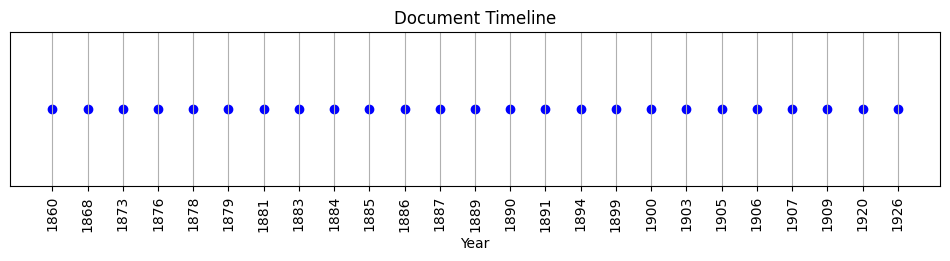

In [5]:
import matplotlib.pyplot as plt

generalEDA(CTILC_df, "CTILC")

In [6]:
# other EDA
print()
print(CTILC_df["Author"].value_counts()[0:5])
print()
CTILC_df["Decade"] = CTILC_df["Year"].apply(lambda x :x[-2]+"0")
CTILC_df["Decade"].value_counts()


Author
Serra i Pagès, Rossend               2
Monserdà, Dolors                     2
Querol i Campos, Vicent Wenceslau    1
Picó i Campamar, Ramon               1
Ubach i Vinyeta, Francesc            1
Name: count, dtype: int64



Decade
80    8
00    6
90    5
70    5
20    2
60    2
Name: count, dtype: int64

In [7]:
# dropping any duplicates just in case
CTILC_df = CTILC_df.drop_duplicates(subset="Text", keep="first")

In [8]:
# storing CTILC dataframe as a pickle
CTILC_df.to_pickle("CTILC.pkl")

**Exploratory Analysis Summary:**\
After parsing the data and turining it into a pandas data frame, the CLTIC data frame has 5 columns.\
Out of the 5, four of the columns correspond to the metadata, specifically the works' ID, the author of the text, its title and year of publication.\
The fifth column is the content of the work, in other words the text.\
The oldest work from the CLTIC copora is from 1860, and the most recent from 1926.\
The total length, and hence the amount of data we have in total from the CLTIC corpora is about 700,000 characters.\
These come from different length texts, as we find that the shortest participates to the total with over 9,000 word characters, and the longest with about 70,000 characters.\
The average length of the 28 texts our subset of the corpora contains is about 25,000 characters per text.\
Covering the over 65 years time-span the texts are not evenly spread. We find a bigger representation of the years closer to the century change. As the 1880s and the 1900s are the 2 most represented centuries in that order. Followed by the 1890s and 1870s, which both are represented with 5 texts. The 1860s and 1920s, the two ends of the time-span are the least represented with 2 texts each. Not represented at all we find the 1910s. However, as we see in the timeline plot many of the 1900s texts are from the late 1900s, including texts from the 1907 and 1909. It is descently spread and gives us descent coverage of the time-span.\
The maximum amount of texts included in the corpora written by the same author is at a maximum of two, and just for two authors, which allows us to make inferences without being tripped by the specific authors' styles, or having a same style and author influence or become a bias of the time-span's data. 

### 2.2 Parlament Parla

The files are .tsv, so we will parse them using Pandas.\
Their encoding is UTF-8 but CRFL line terminators, that were converted to FL line terminators using dos2unix on terminal.

In [9]:
# loading data and creating a Pandas dataframe:

In [10]:
def partition_reading(path):
    '''
    Function takes in a path and returns a dataframe containing:
        1) the content of the tsv file
        2) a column with the partition extracted from the 4th to 15th character of the path starting from the back
    '''
    df = pd.read_csv(path,  sep="\t", header = 0)
    df["Partition"] = path[-15:-4]
    return df

In [11]:
# importing os
import os
#corpus_root = "dataCAT/ParlamentParla"

#reading in each of the partitions and turning them into separate data frames
clean_tr = partition_reading("data/ParlamentParla/clean_train.tsv")
clean_dev = partition_reading("data/ParlamentParla/clean_dev.tsv")
clean_ts = partition_reading("data/ParlamentParla/clean_test.tsv")
other_dev = partition_reading("data/ParlamentParla/other_dev.tsv")
other_ts = partition_reading("data/ParlamentParla/other_test.tsv")

#merging data frames in a single dataframe through concatenation
parlament_parla_df = pd.concat([clean_tr, clean_dev, clean_ts, other_dev, other_ts])
parlament_parla_df.columns = ["Speaker_id", "Path", "Text", "Gender", "Duration", "Partition"]

#taking a look at part of the dataframe
parlament_parla_df.head()

,Speaker_id,Path,Text,Gender,Duration,Partition
0,164,clean_train/3/1/31ca4d158eaef166c37a_18.87_23....,perquè que el president de catalunya sigui reb...,M,4.71,clean_train
1,164,clean_train/3/1/31ca4d158eaef166c37a_60.13_65....,que lliga absolutament amb allò que vostè diu ...,M,5.50,clean_train
2,336,clean_train/2/8/2803008bb00cb0c86de6_17.0_30.1...,gràcies presidenta consellera atès l'inici del...,M,13.15,clean_train
3,336,clean_train/2/8/2803008bb00cb0c86de6_31.03_44....,li volem preguntar si el seu departament té pr...,M,13.02,clean_train
4,336,clean_train/2/8/2803008bb00cb0c86de6_44.74_53....,per tal d'iniciar la recuperació de l'ensenyam...,M,8.49,clean_train


In [12]:
generalEDA(parlament_parla_df, "Parlament Parla")

--- EDA Parlament Parla ---
The dataframe has: 87424 rows 6 columns 

Dataframe's info is:
<class 'pandas.core.frame.DataFrame'>
Index: 87424 entries, 0 to 1898
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Speaker_id  87424 non-null  int64  
 1   Path        87424 non-null  object 
 2   Text        87424 non-null  object 
 3   Gender      87424 non-null  object 
 4   Duration    87424 non-null  float64
 5   Partition   87424 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.7+ MB
None 

The Dataframe's 6 columns are: 
 Index(['Speaker_id', 'Path', 'Text', 'Gender', 'Duration', 'Partition'], dtype='object') 

The total length of the Dataframe excluding the metadata is: 
 13174757 

The description of the dataframe is: 
          Speaker_id      Duration      Text_len
count  87424.000000  87424.000000  87424.000000
mean     184.029866      9.135149    150.699545
std      104.624795      3.26

In [13]:
# dataframe-specific EDA
print(parlament_parla_df["Gender"].value_counts())
print()

Gender
M    53220
F    34204
Name: count, dtype: int64



**Exploratory Analysis Summary:**\
After parsing the data and turining it into a pandas dataframe, the Parlament Parla data frame has 6 columns.\
Out of the 6, five of the columns correspond to the metadata. Provided by the resource itself we find 4 metadata columns: the speaker id, the path of the corresponding sound, the gender of the speaker and the duration of the audio file the transcription corresponds to. Also as metadata, we find the column previously created identifying what partition of the data the audio file content belongs to, te partitions being defined by the folders and then stored as variables in the "Partiction" column of the dataframe.\
The third column, and only non-metadata one, adding up to the 6 total is the transcription of the content of the audio file.\
There is no metadata on when the recording was done nor transcribed.\
The total length, and hence the amount of data we have in total from the Parlament Parla corpora is about 10,000,000 word characters.\
The transcription that contributes with the least amount of data is only 7 word characters long, while the longest is about 670 word characters.\
The average length of the over 87,000 transcriptions is about 150 characters per transcription.\
The genders are not evenly represented on the corpora, but close enough that it shouldn't pose a problem. as both are represented about 10,000 transcriptions off of 40,000 transcriptions.
While it is

In [14]:
# dropping any duplicates just in case
parlament_parla_df = parlament_parla_df.drop_duplicates(subset="Text", keep="first")

In [15]:
# storing parlament-parla dataframe as a pickle
parlament_parla_df.to_pickle("parlaparla.pkl")

### 2.3 ParlaMint-ES-CT

Files are in multiple formats.\
To be consistent with the other datasets, which are less flexible, we'll use:
* tsv documents for the metadata
* txt documents for the text content/transcription

In [16]:
#ParlaMint part 1 - Metadata/tsv
import glob

# defining the path where ParlaMint data is stored
data_path = "data/ParlaMint-ES-CT.ana/ParlaMint-ES-CT.txt"  # Adjust to your directory

# loading all metadata/.tsv files
metadata_files = glob.glob(os.path.join(data_path, "**", "*-meta.tsv"))

# reading in and concatenating all metadata files
metadata = []
for file in metadata_files:
    meta_df = pd.read_csv(file, sep="\t", index_col = False)
    metadata.append(meta_df)

metadata_df = pd.concat(metadata)

# taking a quick look at the metadata dataframe
metadata_df.head()

,Text_ID,ID,Title,Date,Body,Term,Session,Meeting,Sitting,Agenda,...,Speaker_MP,Speaker_minister,Speaker_party,Speaker_party_name,Party_status,Party_orientation,Speaker_ID,Speaker_name,Speaker_gender,Speaker_birth
0,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.1.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,notMP,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970
1,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.224.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,MP,notMinister,GP-ERC,Grup Parlamentari Esquerra Republicana de Cata...,Coalition,Entre centreesquerra i esquerra,VilaltaMarta,"Vilalta i Torres, Marta",F,1984
2,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.2.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,notMP,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970
3,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.3.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,notMP,Minister,ERC,Esquerra Republicana de Catalunya,-,Entre centreesquerra i esquerra,VilagràLaura,"Vilagrà Pons, Laura",F,1976
4,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.4.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,notMP,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970


In [17]:
#ParlaMint part 2 - txt/content

# loading all text files
text_files = glob.glob(os.path.join(data_path, "**", "*.txt"), recursive=True)

# reading in and concatenating all text files
text_list = []
for file in text_files:
    if "README" not in file: # avoiding the README.txt getting mixed up with our data
        text_df = pd.read_csv(file, sep="\t", header = None)
        text_list.append(text_df)

text_df = pd.concat(text_list)

# giving name columns ID and Text to the dataframe columns
text_df = text_df.rename(columns ={0: "ID", 1:"Text"})

# taking a quick look at the txt files dataframe
text_df.tail()

,ID,Text
126,ParlaMint-ES-CT_2016-06-09-1802.127.0,"Moltes gràcies, senyor Fernández. A continuaci..."
127,ParlaMint-ES-CT_2016-06-09-1802.128.0,"Gràcies, presidenta. Bon dia. Des de la CUP, e..."
128,ParlaMint-ES-CT_2016-06-09-1802.129.0,"Moltes gràcies, senyora Vehí. A continuació, t..."
129,ParlaMint-ES-CT_2016-06-09-1802.130.0,"Gràcies, presidenta. Vicepresident, consellera..."
130,ParlaMint-ES-CT_2016-06-09-1802.131.0,"Moltes gràcies, senyor Bonvehí. Acabat el deba..."


In [18]:
# let's compare the two data frames text and metadata to see if we can merge them
print("The metadata data frame has the following dimensions:", metadata_df.shape)
print("The text data frame has the following dimensions:", text_df.shape)

The metadata data frame has the following dimensions: (50824, 23)
The text data frame has the following dimensions: (50824, 2)


In [19]:
# the number of rows matches which is a great sign that no data was left behind in the creation of the data frame
# it lets us know that we can merge it by using the file IDs

In [20]:
# merging with ID as index
parlaMint_df = metadata_df.merge(text_df, on="ID", how="outer")

In [21]:
# taking a quick look at the ParlaMint dataframe
parlaMint_df.tail()

,Text_ID,ID,Title,Date,Body,Term,Session,Meeting,Sitting,Agenda,...,Speaker_minister,Speaker_party,Speaker_party_name,Party_status,Party_orientation,Speaker_ID,Speaker_name,Speaker_gender,Speaker_birth,Text
50819,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.95.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970,"I, finalment, en nom del Grup Mixt, té la para..."
50820,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.96.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-GM,Grup Mixt,-,Entre centredreta i dreta,FernándezAlejandro,"Fernández Álvarez, Alejandro",M,1976,"Gràcies, presidenta. Quan es parla del litoral..."
50821,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.97.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970,"Moltes gràcies. Finalment, per pronunciar-se s..."
50822,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.98.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-CUP,Grup Parlamentari de la Candidatura d'Unitat P...,Opposition,Entre esquerra i extrema esquerra,CornellàDani,"Cornellà Detrell, Dani",M,1978,"Bé, gràcies. Primer de tot, faré una esmena in..."
50823,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.99.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970,"Un moment, diputat. Silenci, si us plau. Deman..."


In [22]:
# re-checking dimensions
print("Both the metadata and text dataframes had the following dimensions:", metadata_df.shape)
print("The merged data frame has the following dimensions:", parlaMint_df.shape)

Both the metadata and text dataframes had the following dimensions: (50824, 23)
The merged data frame has the following dimensions: (50824, 24)


**Comment:**\
The dimensions are correct.\
There is the same number of rows and the text column has been added to the 23 columns that the metadata dataframe had before.

--- EDA ParlaMint ---
The dataframe has: 50824 rows 24 columns 

Dataframe's info is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50824 entries, 0 to 50823
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Text_ID             50824 non-null  object
 1   ID                  50824 non-null  object
 2   Title               50824 non-null  object
 3   Date                50824 non-null  object
 4   Body                50824 non-null  object
 5   Term                50824 non-null  object
 6   Session             50824 non-null  object
 7   Meeting             50824 non-null  int64 
 8   Sitting             50824 non-null  int64 
 9   Agenda              50824 non-null  object
 10  Subcorpus           50824 non-null  object
 11  Lang                50824 non-null  object
 12  Speaker_role        50824 non-null  object
 13  Speaker_MP          50824 non-null  object
 14  Speaker_minister    50824 non-nu

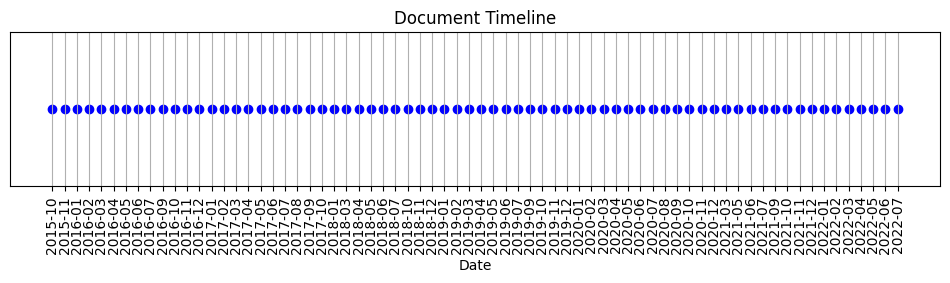

In [23]:
generalEDA(parlaMint_df, "ParlaMint")

In [24]:
# dataframe-specific EDA
print()
print(parlaMint_df["Speaker_gender"].value_counts())
print()
print("The total of speakers is:", len(set(parlaMint_df["Speaker_name"].values)))
print()
print("The transcription count by speaker is:", "\n", parlaMint_df["Speaker_name"].value_counts()[:10])
print()
percentage = (100 * parlaMint_df["Speaker_name"].value_counts().iloc[0]) / parlaMint_df.shape[0]
print("Percentage of the data spoken/recorded from the most frequent speaker on the corpora:", f"{percentage:.2f}%")
print()

# dictionary to store count per year, with year as key
year_count = {}

# setting date as the index of the dataframe
parlaMint_df = parlaMint_df.set_index("Date")

# iterating over the rows 
for date, row in parlaMint_df.iterrows():
    date = date[0:4]
    if date not in year_count:
        year_count[date] = 1  # adding year key to year_count
    else:
        year_count[date] += 1 # adding count to the year_count year

print("Year count sorted by year:", "\n", year_count, "\n")
year_count = sorted(year_count.items(), key=lambda x: x[1], reverse = True)
print("Year count sorted by transcriptions count:", "\n", year_count)
print()

parlaMint_df = parlaMint_df.reset_index() # reseting parlaMint index, so Date is not index anymore

#-----------------------------------------------------------------------------
speaker_toks = {}

# setting speaker as the index of the dataframe
parlaMint_df = parlaMint_df.set_index("Speaker_name")

# iterating over the rows 
for speaker, row in parlaMint_df.iterrows():
    if speaker not in speaker_toks:
        speaker_toks[speaker] = row["Text_len"]  # initializing author's length total
    else:
        speaker_toks[speaker] += row["Text_len"] # accumulating length to already present author

parlaMint_df = parlaMint_df.reset_index() # reseting parlaMint index, so Speaker_name is not index anymore

sorted_speaker_toks = sorted(speaker_toks.items(), key=lambda x: x[1], reverse = True)
top5_speaker_toks = sorted_speaker_toks[:5]
for item in top5_speaker_toks:
    speaker = item[0]
    print(speaker, "-", speaker_toks[speaker])

print()
percentage = (100 * speaker_toks[top5_speaker_toks[0][0]]) / parlaMint_df["Text_len"].sum()

print()
print("Percentage of the data spoken/recorded from the most frequent speaker on the corpora in characters:", f"{percentage:.2f}%")


Speaker_gender
M    27950
F    22874
Name: count, dtype: int64

The total of speakers is: 348

The transcription count by speaker is: 
 Speaker_name
Torrent i Ramió, Roger            10173
Forcadell i Lluís, Carme           8109
Borràs i Castanyer, Laura          4926
Costa i Rosselló, Josep            1390
Gallego i Herrera, Joan Carles     1079
Carrizosa Torres, Carlos            977
Rodríguez i Serra, Santi            626
Aragonès i Garcia, Pere             616
Fernández Álvarez, Alejandro        547
Torra i Pla, Joaquim                531
Name: count, dtype: int64

Percentage of the data spoken/recorded from the most frequent speaker on the corpora: 20.02%

Year count sorted by year: 
 {'2015': 194, '2016': 7955, '2017': 8055, '2018': 5659, '2019': 10059, '2020': 7304, '2021': 5726, '2022': 5872} 

Year count sorted by transcriptions count: 
 [('2019', 10059), ('2017', 8055), ('2016', 7955), ('2020', 7304), ('2022', 5872), ('2021', 5726), ('2018', 5659), ('2015', 194)]

Torrent i 

**Exploratory Analysis Summary:**\
After parsing the data and turining it into a pandas data frame, the ParlaMint data frame has 24 columns.\
Out of the 24, twenty-three of the columns correspond to the metadata, all extracted from the tsv files. Some examples are the text ID, the role of the speaker, their gender, their year of birth and Language they speak in (relevant when comparing the different languages in the ParlaMint corpora).\
The last column, the 25th is the content/text, the transcription of the plenary session which as been extracted from the txt files and included in the dataframe previously.\
The oldest work from the ParlaMint copora is from October 2015, and the most recent from September 2022.\
The total length, and hence the amount of data we have in total from the ParlaMint corpora is about 90,000,000 characters.\
These come from different length texts, as we find that the shortest contributes to the total with 2 word characters, and the longest with about 100,000 characters.\
The average length of the 50824 transcriptions is about 1800 characters per text.\
The corpora give us information about Catalan through a span of 7 years. All of the seven years are represented in the corpora. However, while in 2019 over 10,000 transcriptions were recorded, in 2015 not even 200 were recorded. That is the exception, however, as the rest of the years, from 2016 to 2019, all are represented with over 5,000 transcriptions.\
Fortunately, the Parlament Parla corpora, previously loaded, contains data from 2007 to 2015 which will make up for this difference.\
The speaker's gender is evenly represented in the corpora, as we find around 2,500 transcriptons for both female and male speakers.\
There speech is from about 350 speakers which allows us to assume our data is not speaker-specific. However, we do note that the most frequent speaker in the corpora contributes to a 20% of the data. Looking at that percentage, it seemed like it could be a problem, as the specific speaker's speech style could be changing our analysis. To be certain about whether most of the data was on their speech or not the percentage was calculated off characters. As a result we found that only 3.36% of the data recorded was said by the most frequent speaker on the data set, which allows us to conclude it shouldn't be an issue when analyzing the data and drawing conclusions.

In [25]:
# dropping any duplicates just in case
parlaMint_df = parlaMint_df.drop_duplicates(subset="Text", keep="first")

In [26]:
# storing ParlaMint dataframe as pickle
parlaMint_df.to_pickle("parlaMint.pkl")

### 2.4 Complete Radioteca.cat

Radioteca is a web-based library so will scrape the transcription of the broadcasts using beautiful soup.
The owner and creator of the library also provided a google sheets file containing the metadata, such as date aired, publisher, program name, title and URL. We will be using that data as well reading it in as a csv file. 

In [27]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

**About the scraping process**\
As radioteca contains a huge amount of data, scraping it on my personal computer was going to take about 16 hours. Therefore it was done using the University of Pittsburgh CRC supercomputing using the following slurm and python commented out cells. The files used in their respective format can be found on the [Scripts](https://github.com/Data-Science-for-Linguists-2025/Linguistic-Markers-Catalan-Substitution/tree/main/scripts) folder.

In [28]:
# copy slurm here

In [29]:
# copy python code here

**Comment:** Next we will read in the full radioteca scraped data and perform the exploratory data analysis on it to check the data we just obtained. 

In [30]:
full_radioteca = pd.read_pickle("radioteca_df.pkl")

In [31]:
full_radioteca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29700188 entries, 0 to 29700187
Data columns (total 10 columns):
 #   Column   Dtype         
---  ------   -----         
 0   Line_id  object        
 1   Speaker  object        
 2   Time     object        
 3   Text     object        
 4   Date     datetime64[ns]
 5   Station  object        
 6   Show     object        
 7   Episode  object        
 8   URL      object        
 9   Year     float64       
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 2.2+ GB


In [32]:
full_radioteca.describe()

,Date,Year
count,29700188,2.970019e+07
mean,2019-10-25 07:27:14.983589632,2.019322e+03
min,1986-10-14 00:00:00,1.986000e+03
25%,2017-03-14 00:00:00,2.017000e+03
50%,2020-08-30 00:00:00,2.020000e+03
75%,2023-04-19 00:00:00,2.023000e+03
max,2025-03-09 00:00:00,2.025000e+03
std,NaN,4.115696e+00


In [33]:
full_radioteca.shape

(29700188, 10)

In [34]:
full_radioteca["Date"] = pd.to_datetime(full_radioteca["Date"])
full_radioteca["Year"] = full_radioteca["Date"].dt.year
item =(full_radioteca[pd.isnull(full_radioteca["Date"]) == True]).index

--- EDA Radioteca.cat ---
The dataframe has: 29700188 rows 10 columns 

Dataframe's info is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29700188 entries, 0 to 29700187
Data columns (total 10 columns):
 #   Column   Dtype         
---  ------   -----         
 0   Line_id  object        
 1   Speaker  object        
 2   Time     object        
 3   Text     object        
 4   Date     datetime64[ns]
 5   Station  object        
 6   Show     object        
 7   Episode  object        
 8   URL      object        
 9   Year     int32         
dtypes: datetime64[ns](1), int32(1), object(8)
memory usage: 2.1+ GB
None 

The Dataframe's 10 columns are: 
 Index(['Line_id', 'Speaker', 'Time', 'Text', 'Date', 'Station', 'Show',
       'Episode', 'URL', 'Year'],
      dtype='object') 

The total length of the Dataframe excluding the metadata is: 
 7861640073 

The data ranges from 1986-10-14 00:00:00 to 2025-03-09 00:00:00 

The data ranges from 1986 to 2025 

The description of the dat

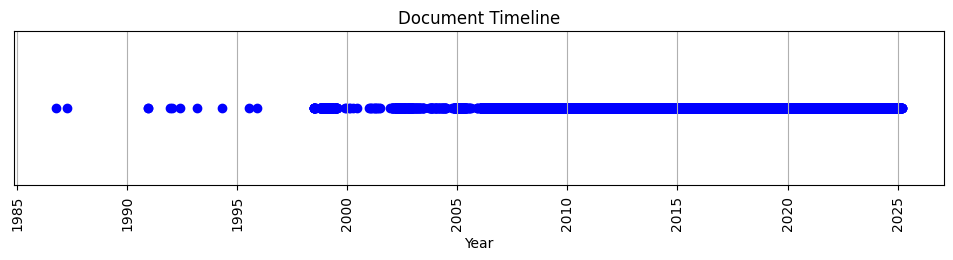

In [35]:
import matplotlib.pyplot as plt
generalEDA(full_radioteca, "Radioteca.cat")

In [36]:
# dataframe-specific EDA
print()
print("The total of different stations are:", len(set(full_radioteca["Station"].values)))
print()
print("The total of lines per station are:", "\n", "\n", full_radioteca["Station"].value_counts())
print()
radioteca_df_linesSpeaker = full_radioteca.groupby("Episode")["Speaker"].value_counts()
#print(radioteca_df_linesSpeaker.head())
print()
print("The maximum number of lines per speaker are:", full_radioteca.groupby("Episode")["Speaker"].value_counts().max())
print("The minimum number of lines per speaker are:", full_radioteca.groupby("Episode")["Speaker"].value_counts().min())
print()
show_grouped = full_radioteca.groupby(["Episode", "Speaker"])["Text_len"].sum()
#print(show_grouped.head())
print()
print("The character count for the speaker contrbuting with the most amount of data is", show_grouped.max())
print("The character count for the speaker contrbuting with the least amount of data is", show_grouped.min())
print()
year_tokscount = full_radioteca.groupby("Year")["Text_len"].sum().sort_values(ascending=False)
print("Characters count per year sorted from most to least characters:")
year_tokscount



The total of different stations are: 286196

The total of lines per station are: 
 
 Station
RAC1                    14812604
Catalunya Ràdio         11187882
iCat                     1590028
Catalunya Música          898505
RTVE                      498344
Catalunya Informació      363000
Cadena SER                 52514
ara.cat                     8375
Ràdio Capital               1428
El Terrat                   1322
Name: count, dtype: int64


The maximum number of lines per speaker are: 82045
The minimum number of lines per speaker are: 1


The character count for the speaker contrbuting with the most amount of data is 58204492
The character count for the speaker contrbuting with the least amount of data is 0

Characters count per year sorted from most to least characters:


Year
2024    1068399683
2023     949832889
2022     790129240
2021     725422466
2019     640352069
2020     629083593
2018     578445117
2017     536274932
2016     420482877
2015     295827153
2014     242552878
2013     209595850
2012     205231452
2025     177366565
2011     125742515
2010      84233024
2009      71170016
2008      54696857
2007      28760482
2006      25492818
2005        985438
2002        434487
2004        422663
2001        236642
2003        145238
1999        115069
1998         71712
1995         67709
1993         34391
2000         10417
1986          9812
1987          4657
1992          4089
1990          3516
1991          1155
1994           602
Name: Text_len, dtype: int64

**Exploratory Analysis Summary:**\
The Radioteca library has been scraped and turned into a 10-column data frame along with the metadata from the CSV file. It is now all in a single data frame containing the Line_id, Speaker, Time, Text, Date, Station, Show, Episode, URL, and Year (extracted from the date for easier comparison and merging with other data frames).\
The oldest work from Radioteca is from 1986; the latest work we scraped from the web library is from 2025.\
The total length, and hence the amount of data we have in total from the Radioteca corpora, is over 7.8 billion characters long.\
These come from different-lengthed texts, as the shortest has zero characters, and the longest contributes about 101,000 characters.\
The average length of the almost 29 million contribution transcriptions is about 265 characters per text.\

The transcriptions give us information about Catalan through almost 25 years. However, not all years are represented, nor is their representation in the data amount the same. While the broadcasts for 2025 add up to over 1 billion characters, we only have barely over 600 characters for 1994. It seems like, overall, we have a lot more recent transcriptions, as we see the character amount increase remarkably from 2005 until 2025. \
The transcribed broadcasts are from shows from over 286,000 different stations, allowing for a less show-specific data frame. However, they don't all provide the same amount of data. RAC1 and Catalunya Radio are clearly the most transcribed in the Radioteca library. However, these are regional chains, so they shouldn't be genre or topic-specific. Nevertheless, it could affect our analysis due to social factors, such as the type of audience of this program. Still, I believe that is part of the nature of this project, as well as using real language data.\
As radio broadcasts can be from conversation-like to even monologues, not all speakers contribute equally. The minimum number of lines per speaker is 1. Still, a single speaker that accounts for the most lines contributes to over 82,000 lines. In terms of characters, that is zero characters for the minimum and over 58,000,000 for the maximum.

**Comment:** Next we will remove any duplicate texts from the dataframe. And store them in a clean one. As the data set is huge and was impossible to drop the duplicates in one go from my personal computer, we will do it by years:

In [37]:
from tqdm import tqdm 
years = set(full_radioteca["Year"])
clean_radioteca = []

for y in tqdm(years):
    cleaned = full_radioteca[full_radioteca["Year"] == y].drop_duplicates(subset="Text")
    clean_radioteca.append(cleaned)

full_radioteca_cleaned = pd.concat(clean_radioteca)

100%|███████████████████████████████████████████| 36/36 [01:32<00:00,  2.58s/it]


In [38]:
full_radioteca.shape

(29700188, 11)

In [39]:
full_radioteca_cleaned.shape

(25315930, 11)

In [40]:
full_radioteca_cleaned.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 25315930 entries, 29700145 to 676059
Data columns (total 11 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Line_id   object        
 1   Speaker   object        
 2   Time      object        
 3   Text      object        
 4   Date      datetime64[ns]
 5   Station   object        
 6   Show      object        
 7   Episode   object        
 8   URL       object        
 9   Year      int32         
 10  Text_len  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 23.0 GB


**Comment:** After dropping the duplicates the number of contributions has dropped from about 29,000,000 to about 25,000,000.

In [43]:
# saving in pieces because its way too big
# saving with parquet extension because pkl is still too big
from tqdm import tqdm

for y in tqdm(years):
    radioteca_per_year = full_radioteca_cleaned[full_radioteca_cleaned["Year"] == y]
    radioteca_per_year.to_parquet(f"radioteca_{y}.parquet", compression="snappy")

100%|███████████████████████████████████████████| 36/36 [03:02<00:00,  5.07s/it]
